# Titanic Data Evaluation

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms
from scipy import stats

filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

del titanic_df['Name']
del titanic_df['Ticket']
del titanic_df['Fare']

def get_deck(row):
    if row['Cabin'] == row['Cabin']:
        return row['Cabin'][0:1]
    return row['Cabin']
    
# We add a new column to the dataset
titanic_df['Deck'] = titanic_df.apply(get_deck, axis=1)


del titanic_df['Cabin']


# Definition: A passenger is a family member if either SibSp or Parch is > 0
def is_family_member(row):
    return not(row['Parch'] == 0 and row['SibSp'] == 0)

# We add a new column to the dataset
titanic_df['IsFamilyMember'] = titanic_df.apply(is_family_member, axis=1)

# We remove the Parch and SibSp columns
del titanic_df['Parch']
del titanic_df['SibSp']

In [74]:
deck_titanic_df = titanic_df.dropna(subset=['Deck'])
deck_titanic_df.count()

deck_titanic_df.mean

C:\Users\jensl\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [71]:
deck_titanic_df.groupby(['Deck', 'Pclass']).count()

PassengerId  Survived  Sex  Age  Embarked  IsFamilyMember
Deck Pclass                                                           
A    1                15        15   15   12        15              15
B    1                47        47   47   45        45              47
C    1                59        59   59   51        59              59
D    1                29        29   29   27        29              29
     2                 4         4    4    4         4               4
E    1                25        25   25   24        25              25
     2                 4         4    4    3         4               4
     3                 3         3    3    3         3               3
F    2                 8         8    8    8         8               8
     3                 5         5    5    3         5               5
G    3                 4         4    4    4         4               4

In [72]:
deck_titanic_df.groupby(['Deck', 'Pclass']).mean()['Survived']

Deck  Pclass
A     1         0.466667
B     1         0.744681
C     1         0.593220
D     1         0.758621
      2         0.750000
E     1         0.720000
      2         0.750000
      3         1.000000
F     2         0.875000
      3         0.200000
G     3         0.500000
Name: Survived, dtype: float64

C:\Users\jensl\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


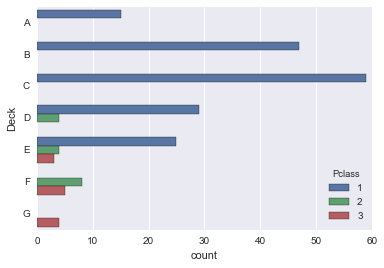

In [76]:
%matplotlib inline
sns.countplot(y="Deck", hue="Pclass", data=deck_titanic_df.sort('Deck'))

## Plots ##